In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2023-06-10 09:57:37--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.126.101, 74.125.126.100, 74.125.126.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.126.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/740r58r144528rvidma5u7rhfrq27hj7/1686391050000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=d9a0d778-ec2c-4c63-88c0-56a6a08bcf94 [following]
--2023-06-10 09:57:39--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/740r58r144528rvidma5u7rhfrq27hj7/1686391050000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=d9a0d778-ec2c-4c63-88c0-56a6a08bcf94
Resolving doc-14-3o-docs.googleusercontent.com (doc-14-3o-docs.googleusercontent.com)... 142.251.120.132, 2607:f8b0

In [ ]:
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000', '')

data_array=np.array(data_df)
data_array=np.delete(data_array,0,1)
data_array=data_array.astype(np.int)
print(data_array)

assert (data_array.shape == (21613,20))

data_df.head()


[[20141013   221900        0 ...        0        0        0]
 [20141209   538000        0 ...        0        0        0]
 [20150225   180000       -1 ...        0        1        0]
 ...
 [20140623   402101       -1 ...        0       -1        0]
 [20150116   400000        0 ...        1        0        0]
 [20141015   325000       -1 ...        0       -1        0]]


<ipython-input-22-01beb90bcc9b>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_array=data_array.astype(np.int)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.886126,20141013,221900.0,-0.398728,-1.447430,-0.979812,-0.228316,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.734691,-0.658666,-0.544885,-0.210124,1.870108,-0.352564,-0.306072,-0.943333,-0.260709
1,0.637496,20141209,538000.0,-0.398728,0.175603,0.533622,-0.189881,0.936484,-0.087171,-0.305752,...,-0.558823,0.460830,0.245136,-0.681063,4.746568,0.879547,1.161541,-0.746324,-0.432676,-0.187863
2,0.365435,20150225,180000.0,-1.473925,-1.447430,-1.426221,-0.123296,-0.915406,-0.087171,-0.305752,...,-1.409554,-1.229805,-0.658666,-1.293862,-0.210124,-0.933367,1.283507,-0.135652,1.070115,-0.172371
3,-0.727639,20141209,604000.0,0.676469,1.149422,-0.130547,-0.244009,-0.915406,-0.087171,-0.305752,...,-0.558823,-0.891678,1.397483,-0.204441,-0.210124,1.085135,-0.283281,-1.271787,-0.914153,-0.284515
4,-0.912860,20150218,510000.0,-0.398728,-0.149004,-0.435412,-0.169649,-0.915406,-0.087171,-0.305752,...,0.291909,-0.130892,-0.658666,0.544535,-0.210124,-0.073634,0.409541,1.199307,-0.272184,-0.192844


In [ ]:
mean_array = np.mean(data_array,0)                                        # this should be an array, each entry should be mean of a column
sd_array = np.mean(data_array,0)                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean_array)/sd_array
print(data_array_norm)

print(data_array_norm.shape)


[[-1.43451262e-04 -5.89141137e-01 -1.00000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [-1.33721270e-04 -3.86629812e-03 -1.00000000e+00 ... -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [ 3.13858335e-04 -6.66721066e-01  2.63582278e+01 ... -1.00000000e+00
   1.08687534e+01 -1.00000000e+00]
 ...
 [-1.62811959e-04 -2.55490042e-01  2.63582278e+01 ... -1.00000000e+00
  -1.28687534e+01 -1.00000000e+00]
 [ 3.08447268e-04 -2.59380147e-01 -1.00000000e+00 ...  1.55237003e+01
  -1.00000000e+00 -1.00000000e+00]
 [-1.43351976e-04 -3.98246370e-01  2.63582278e+01 ... -1.00000000e+00
  -1.28687534e+01 -1.00000000e+00]]
(21613, 20)


In [ ]:
labels = data_array_norm[:,1]                                                                                                            # extract the price column from data

x_array_norm = np.delete(data_array_norm,1,1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


In [ ]:
def loss(y_pred,y_true):

  mse = np.mean(np.square(np.subtract(y_true,y_pred)))     


  return mse

In [ ]:
def y(x,a,b):
  m,n = x.shape
  
  y_pred = np.dot(x,a) + b
  y_pred = y_pred.astype(np.float)
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  m,n = x.shape
  yp = y(x,a,b)
  y_true = y_true.astype(np.float)
  d=[1]*n
  for k in range(0,n,1):
    d[k] = 2*np.mean(x[:,k]*np.subtract(yp,y_true))
  da = np.array(d)              
  db = 2*np.mean(np.subtract(yp,y_true))             

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 100):
  m,n = x.shape
  loss_mse = []
  v = [0]*n                                 
  a = np.array(v) 
  n, = a.shape                            
  b = 0 

  for i in range(epochs):
    for j in range(0,n,1):
      a[j] = a[j] - learning_rate*gradient(x,a,b,y_true)[0][j]
    b = b - learning_rate*gradient(x,a,b,y_true)[1]

    l_mse = loss(y(x,a,b),y_true)                                
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)
  
  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

In [ ]:
epochs = 100              
learn_rate = 0.01        

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

<ipython-input-26-1080f616bc39>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.float)
<ipython-input-27-51dc0908954a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = y_true.astype(np.float)


Epoch  1  Completed! loss =  0.45118433923506135
Epoch  2  Completed! loss =  0.45118390541102477
Epoch  3  Completed! loss =  0.45118348876642
Epoch  4  Completed! loss =  0.4511830886209416
Epoch  5  Completed! loss =  0.4511827043212241
Epoch  6  Completed! loss =  0.45118233523977547
Epoch  7  Completed! loss =  0.45118198077395216
Epoch  8  Completed! loss =  0.4511816403449755
Epoch  9  Completed! loss =  0.4511813133969863
Epoch  10  Completed! loss =  0.45118099939613754
Epoch  11  Completed! loss =  0.4511806978297223
Epoch  12  Completed! loss =  0.4511804082053371
Epoch  13  Completed! loss =  0.4511801300500775
Epoch  14  Completed! loss =  0.4511798629097663
Epoch  15  Completed! loss =  0.45117960634821136
Epoch  16  Completed! loss =  0.451179359946494
Epoch  17  Completed! loss =  0.45117912330228466
Epoch  18  Completed! loss =  0.45117889602918604
Epoch  19  Completed! loss =  0.4511786777561021
Epoch  20  Completed! loss =  0.45117846812663226
Epoch  21  Completed! l

<ipython-input-26-1080f616bc39>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = y_pred.astype(np.float)
<ipython-input-27-51dc0908954a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = y_true.astype(np.float)


Epoch  1  Completed! loss =  0.5235667499835867
Epoch  2  Completed! loss =  0.5235528199172582
Epoch  3  Completed! loss =  0.5235394414815564
Epoch  4  Completed! loss =  0.5235265928319085
Epoch  5  Completed! loss =  0.5235142529887866
Epoch  6  Completed! loss =  0.5235024018034523
Epoch  7  Completed! loss =  0.5234910199250573
Epoch  8  Completed! loss =  0.5234800887690468
Epoch  9  Completed! loss =  0.5234695904868142
Epoch  10  Completed! loss =  0.5234595079365579
Epoch  11  Completed! loss =  0.523449824655292
Epoch  12  Completed! loss =  0.523440524831964
Epoch  13  Completed! loss =  0.52343159328164
Epoch  14  Completed! loss =  0.5234230154207088
Epoch  15  Completed! loss =  0.5234147772430704
Epoch  16  Completed! loss =  0.5234068652972664
Epoch  17  Completed! loss =  0.5233992666645164
Epoch  18  Completed! loss =  0.5233919689376232
Epoch  19  Completed! loss =  0.523384960200715
Epoch  20  Completed! loss =  0.5233782290097884
Epoch  21  Completed! loss =  0.52

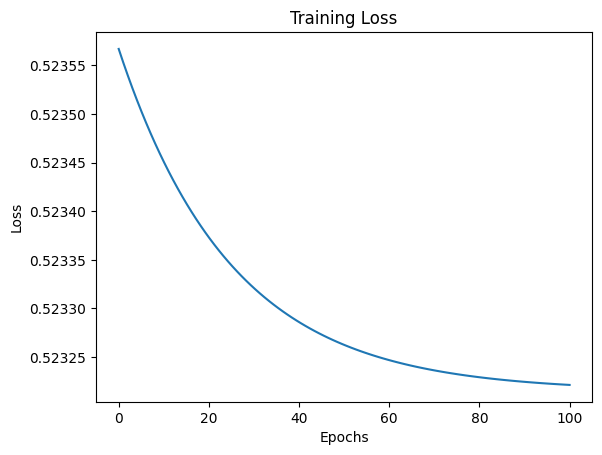

In [ ]:
test_loss = gradient_descent(x_test,y_test,learn_rate,epochs)
print("Loss on test data = ",test_loss)
epo=np.linspace(0,epochs,epochs)

plt.plot(epo,test_loss[0])                 
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       3       4       2       8       

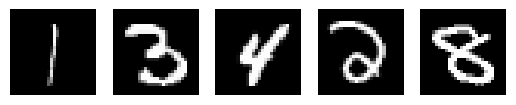

In [ ]:
n = 5   

index = np.random.choice(x_train.shape[0],5)  
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()


In [ ]:
x_train = x_train/256
x_test = x_test/256

x_train_flatten = x_train.reshape(60000,784)  
x_test                                   
x_test_flatten = x_test.reshape(10000,784)                                  

n_validation = 10000 
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size=1/6,random_state=42,shuffle=True)
x_validation = x_validation.reshape(10000,784)
x_train_flatten = x_train.reshape(50000,784)                                   
print(x_train.shape, y_train.shape)


(50000, 28, 28) (50000,)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]
    )


keras.utils.plot_model(model,show_shapes=True)
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f680a1cfac0>>

In [ ]:
from keras import losses, optimizers, metrics
model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy',metrics=["accuracy"])

n_epochs = 10              
batch_size = 512            
history = model.fit(x_train_flatten,y_train,epochs=10,validation_data=(x_validation,y_validation))
print(history.history.keys())

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4908 - accuracy: 0.8741 - val_loss: 0.3279 - val_accuracy: 0.9088
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3137 - accuracy: 0.9128 - val_loss: 0.2948 - val_accuracy: 0.9180
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2900 - accuracy: 0.9193 - val_loss: 0.2798 - val_accuracy: 0.9200
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2782 - accuracy: 0.9229 - val_loss: 0.2756 - val_accuracy: 0.9228
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2709 - accuracy: 0.9243 - val_loss: 0.2719 - val_accuracy: 0.9214
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2656 - accuracy: 0.9268 - val_loss: 0.2712 - val_accuracy: 0.9240
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9282 - val_loss: 0.2718 - val_accuracy:

1000/1000 [==============================] - 1s 1ms/step - loss: 0.2645 - accuracy: 0.9268
Loss =  0.26449525356292725
Accuracy =  92.6800012588501 %


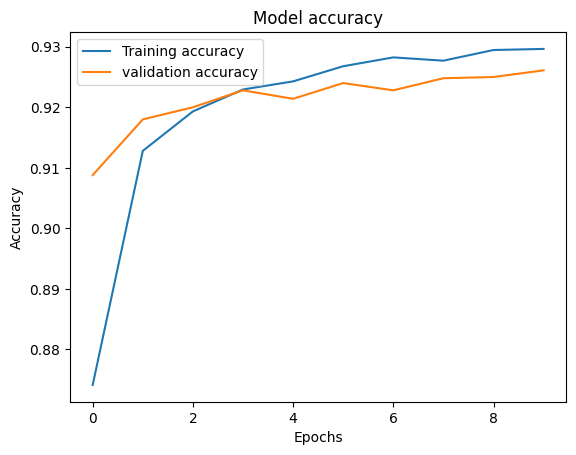

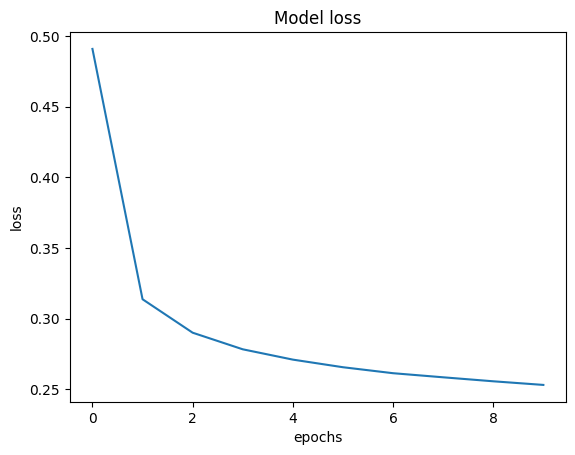

In [ ]:
results = model.evaluate(x_test_flatten,y_test, 10)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")
plt.plot([i for i in range(n_epochs)],history.history['accuracy'], label="Training accuracy")
plt.plot([i for i in range(n_epochs)],history.history['val_accuracy'],label="validation accuracy" )
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


plt.plot([i for i in range(n_epochs)],history.history['loss'], label="loss")
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

label: 5       4       8       7       7       [3053 2514 7689 8959 4453]


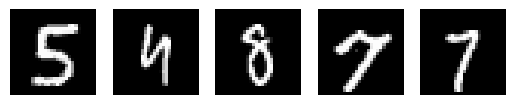

Predicted value: 
313/313 [==============================] - 1s 2ms/step
7       

In [ ]:
n = 5  
index = np.random.choice(x_test.shape[0],5)  
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")            
    plt.axis("off")
    print(y_test[ind],end="       ")
print(index)
plt.show()
print("Predicted value: ")
for i,ind in enumerate(index):
  di = model.predict(x_test_flatten)
  digit = np.argmax(di[ind])
  print(digit,end="       ")